<font color='green' size='6'>Italy </font>
<font color ='red' size='6'>Menu</font>
<br>

## Research Question
#### Generating meal compositions with AI

**Name:** Andrea <br>
**Name:** Emilio <br>
**Name:** Mayya Lihovodov <br>

**Name:** Igal Khalfin <br>
**Name:** Dima Vornov  <br>
**Name:** Adi Zamir    <br>
**Name:** Adir Nisim   <br>
**Name:** Nir Levy    <br>

Starting Date: 24/11/2022


<font color='green' size='5'>
Import Modules (Packages) </font>
<br>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import inf
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


<h1><ins>Data Handling Section </ins></h1>
<br>
* read CSV file <br>
* removing rows where quantity < 0 <br>
 * Adding Columns: <br>
<font color='darkgreen'>
    Price_Before_Discount(full price), <br>
    Earnings (Paid price - cost), <br>
    Margin (Earnings / paid price as precentage % view), <br>
    Unit_Price, <br>
    Sale_Month (for EDA and future purpess), <br>
    Menu Category, mapping category by specifay item name (food/soft drink/alcohol).
</font>

In [7]:
df = pd.read_csv('Query_Sicilia_2021.csv', index_col=0)  

In [8]:
df[df.QUANTITY < 0]

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE
2079,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-1,-1.0,0.0,-0.13,NaN
2080,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,MELANZANE AL POMODORO (C),FOOD,RICETTE FOOD,CONTORNO,-1,-3.9,0.0,-0.31,NaN
2081,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,COCA COLA 33CL TIN,BEVERAGE,ACQUA E SOFT DRINKS,SOFT DRINKS,-1,-3.0,0.0,-0.40,NaN
2082,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,FRUTTA FRESCA,FOOD,RICETTE FOOD,FRUTTA,-1,-3.1,0.0,-0.25,NaN
2083,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,GNOCCHI ALLA BOLOGNESE,FOOD,RICETTE FOOD,PRIMO,-1,-4.9,0.0,-0.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335501,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,HAMBURGER ALLA GRIGLIA (C),FOOD,RICETTE FOOD,SECONDO,-1,-8.0,0.0,-0.65,NaN
2335502,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-3,-3.0,0.0,-0.40,NaN
2335859,TENACIA,NAP-TRI,RI,599532021-10-09,20211009,20211009,BAR,TENACIA BAR,71,205011,20.0,VECCHIA ROMAGNA E.N. CL 4,BEVERAGE,RICETTE ALCOLICHE,SUPERALCOLICI LISCI,-1,-4.0,0.0,-0.68,NaN
2336556,TENACIA,NAP-TRI,IR,633972021-10-30,20211030,20211030,SELF,TENACIA Front Desk,16,133936,13.0,BIRRA BECK S 33CL BT,BEVERAGE,BIRRE,BIRRA PAX,-1,-4.5,0.0,-0.65,NaN


In [9]:
positive_quantity_df = df[df['QUANTITY'] > 0].copy()

positive_quantity_df['PRICE_BEFORE_DISCOUNT'] = positive_quantity_df['PRICE_PAID'] + positive_quantity_df['DISCOUNT']
positive_quantity_df['EARNINGS'] = positive_quantity_df['PRICE_PAID'] - positive_quantity_df['COST_OF_SALE']
positive_quantity_df["SALE_MONTH"] = pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).month
positive_quantity_df['MARGIN'] = positive_quantity_df['EARNINGS'] / positive_quantity_df['PRICE_PAID']
positive_quantity_df.loc[positive_quantity_df['MARGIN'] < 0, 'MARGIN'] = 0
positive_quantity_df['MARGIN_RAW'] = positive_quantity_df['MARGIN']
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'] * 100
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'].round(2).astype(str) + '%'
positive_quantity_df['UNIT_PRICE'] = positive_quantity_df['PRICE_PAID'] / positive_quantity_df['QUANTITY']
positive_quantity_df = positive_quantity_df[positive_quantity_df.MARGIN != inf]

In [10]:
menu_category = {
    'FOOD':[ 'CROISSANTS E BREAKFAST', 'SNACK', 'PIZZA', 'SALSE MONOPORZIONE', 'SECONDO', 'PRIMO', 'CONTORNO', 'PANE E COPERTO PASTI', 'ANTIPASTO', 
       'DOLCE', 'FRUTTA', 'PANINI', 'CARAMELLE', 'ALTRO', 'GELATI CONFEZIONATI', 'PANE E COPERTO BREAKFAST', 'CONFETTURE', 'CELIACI',
       'PIATTO UNICO', 'MERENDINE', 'PANE E SIMILI', 'CEREALI', 'FORMAGGI', 'BIBITE SCIROPPATE', 'YOGHURT', 'RICORRENZE E DECORAZIONI' ],
    'SOFT DRINK': [ 
        "CAFFE'", 'ACQUA', 'CAPPUCCINO', 'THE E INFUSI', 'SUCCHI', 'SOFT DRINKS', 'GRANITA', 'CIOCCOLATA', ],
    'ALCOHOL': [
        'VINI ITALIANI', 'SUPERALCOLICI LISCI', 'LATTE MACCHIATO', 'APERITIVO', 'BIRRA PAX', 'COCKTAILS', 'SPUMANTE', 'CHAMPAGNE', 'VINO BIANCO', ],
    'CORRECTION': ['CORREZIONE']
}
mapping = {}
for key in menu_category:
    for value in menu_category[key]:
        mapping[value] = key


positive_quantity_df['MENU_CATEGORY'] = positive_quantity_df['ITEM_CATEGORY'].map(mapping)

 <h1><ins>Data EDA-Visualization </ins></h1>
 <br>
 we want to get point of view from margin and earning

In [11]:
margin_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['MARGIN_RAW'], aggfunc=np.average)
margin_by_location

,MARGIN_RAW
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,0.794625
ANTARES BAR 2,0.852819
ANTARES RISTORANTE,0.868285
ARIES BAR 1,0.795602
ARIES BAR 2,0.834957
...,...
SPL GELATERIA,0.854253
SPM BAR Centrale,0.727487
SPM BAR Piscina,0.732457


In [12]:
earnings_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_location

,EARNINGS
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,215352.15
ANTARES BAR 2,61800.84
ANTARES Front Desk,3738.77
ANTARES RISTORANTE,123926.97
ANTARES Self Pax,187983.09
...,...
SPM RISTORANTE,16414.05
SPM SELF Passeggeri,95559.30
TENACIA BAR,161258.96


<AxesSubplot: xlabel='SHIP'>

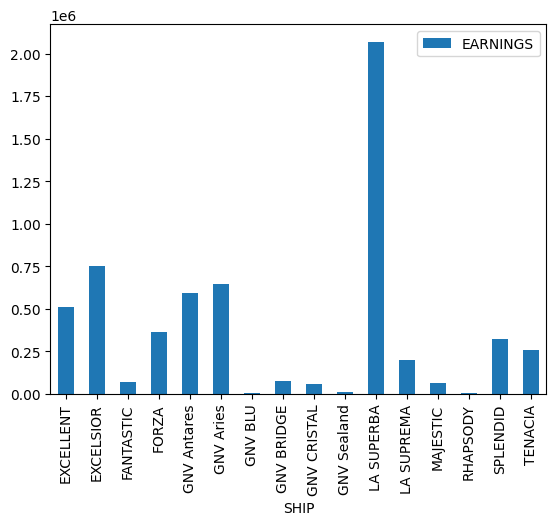

In [13]:
earnings_by_ship = pd.pivot_table(positive_quantity_df, index=['SHIP'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_ship.plot.bar()

<h2>Earnings By Month</h2>
<h4>As we can see, <strong>summer</strong> season is the stongest season of them all when it comes to earnings</h4>

<AxesSubplot: xlabel='SALE_MONTH'>

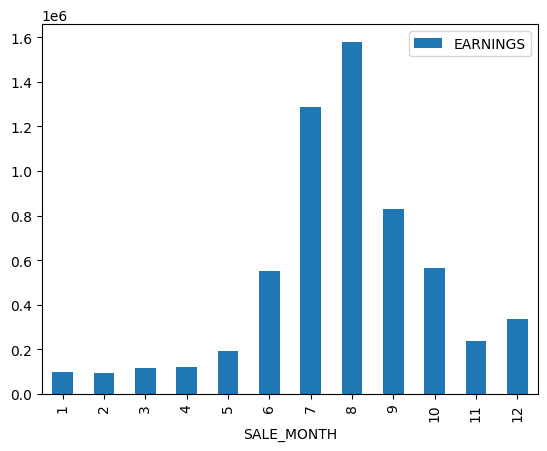

In [14]:
earnings_by_month = pd.pivot_table(positive_quantity_df, index=['SALE_MONTH'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_month.plot.bar()

<h2>Top sellers of each month</h2>
<h4>As we can see, <strong>Summer</strong> season is the stongest season of them all when it comes to earnings</h4>

In [15]:
groupby_quantity = positive_quantity_df.groupby(['SALE_MONTH','ITEM_CATEGORY']).agg({'QUANTITY':sum})
groupby_month = 
_quantity['QUANTITY'].groupby('SALE_MONTH', group_keys=False)
groupby_month.nlargest(3)


SALE_MONTH  ITEM_CATEGORY         
1           CAFFE'                    20633
            PANE E COPERTO PASTI      11910
            CONTORNO                  10446
2           CAFFE'                    21689
            PANE E COPERTO PASTI      13206
                                      ...  
11          PANE E COPERTO PASTI      18818
            CROISSANTS E BREAKFAST    16783
12          CAFFE'                    41241
            PANE E COPERTO PASTI      21818
            CROISSANTS E BREAKFAST    21121
Name: QUANTITY, Length: 36, dtype: int64

In [16]:
seasonal_df = positive_quantity_df.copy()
mapping = {}
for i in range(1,12):
    if(i<3):
        mapping[i]='Winter'
    elif(i>=3 and i<6):
        mapping[i]='Spring'
    elif(i>=6 and i <9):
        mapping[i]='Summer'
    else:
        mapping[i]='Autumn'
mapping[12]='Winter'
seasonal_df['Seasons']= seasonal_df['SALE_MONTH'].map(mapping)
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum})

QUANTITY
Seasons MENU_CATEGORY          
Autumn  ALCOHOL           67651
        CORRECTION         1193
        FOOD             554480
        SOFT DRINK       359204
Spring  ALCOHOL           31752
        CORRECTION          980
        FOOD             299546
        SOFT DRINK       176328
Summer  ALCOHOL          110035
        CORRECTION         1579
        FOOD             864819
        SOFT DRINK       635686
Winter  ALCOHOL           27913
        CORRECTION          776
        FOOD             296348
        SOFT DRINK       174703

<AxesSubplot: ylabel='Seasons'>

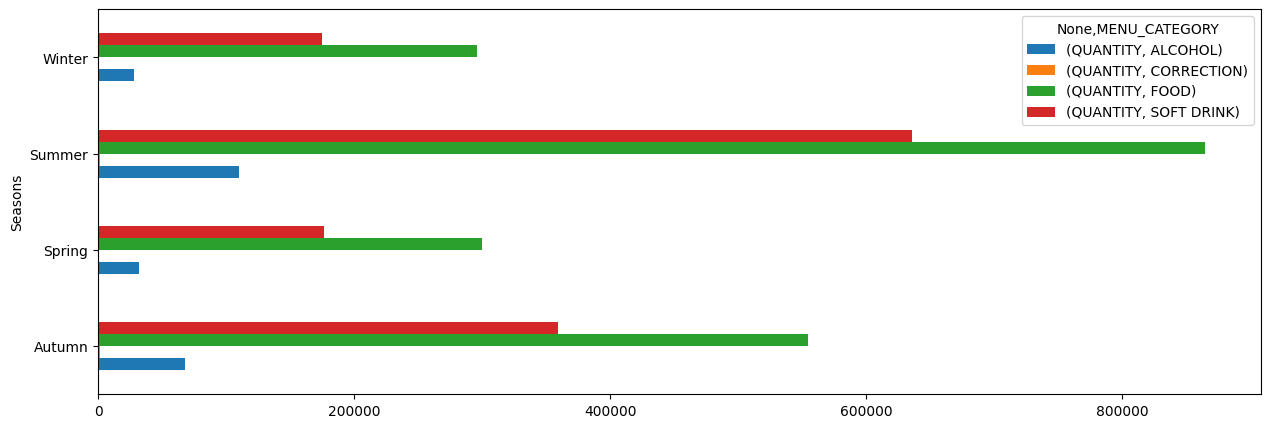

In [17]:
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum}).unstack(1).plot.barh(figsize=(15,5))

<AxesSubplot: ylabel='Seasons'>

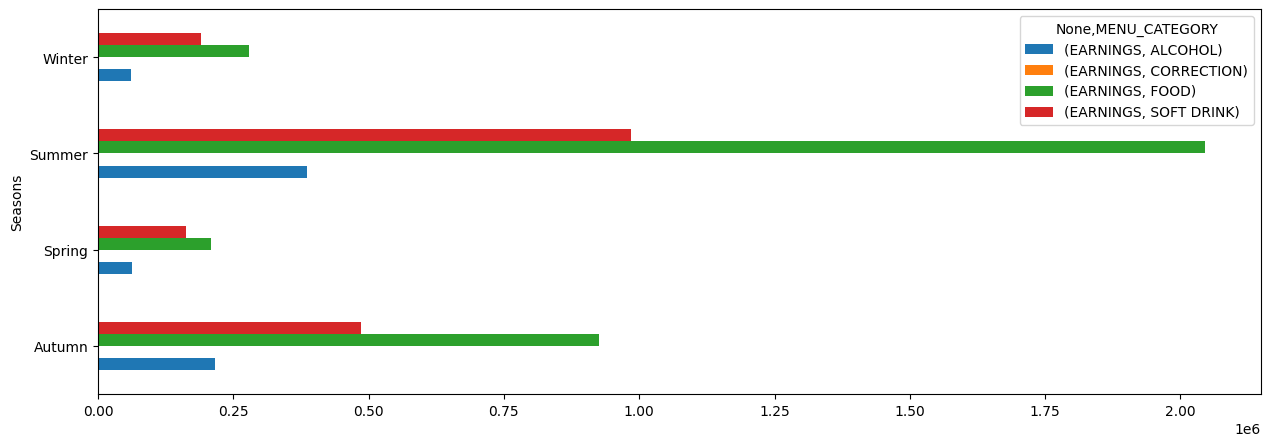

In [18]:
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))

<AxesSubplot: ylabel='SALE_DAY'>

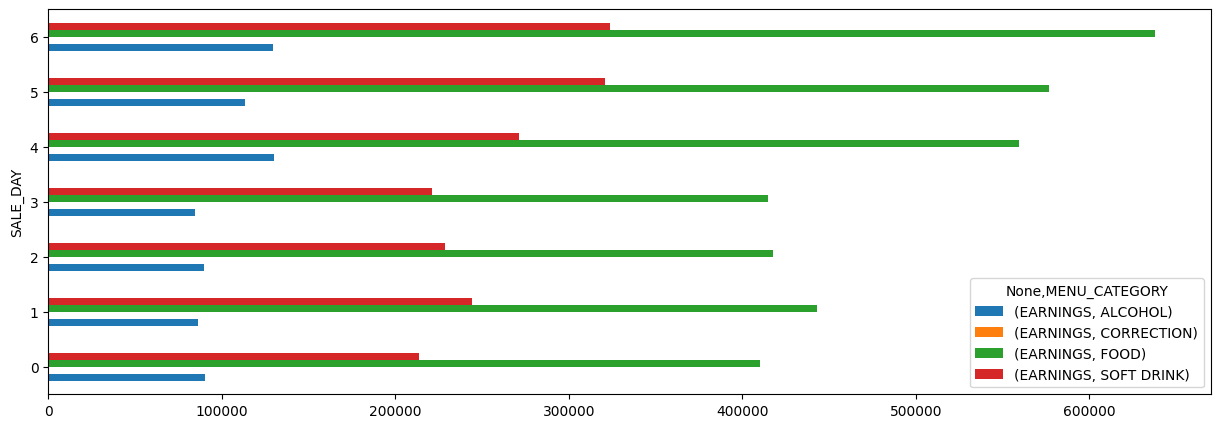

In [19]:

seasonal_df["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
seasonal_df.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))


<AxesSubplot: ylabel='SALE_DAY'>

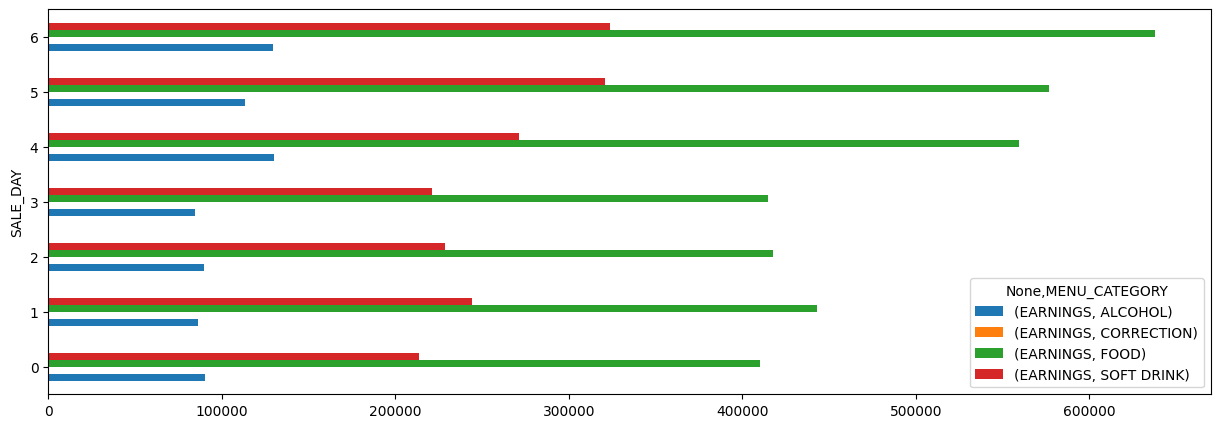

In [20]:
seasonal_df["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
seasonal_df.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':'sum'},{'EARNINGS':'mean'}).unstack(1).plot.barh(figsize=(15,5))

## Sales season classification
### We will be classifing all the sales periods to season tiers of sales volumes: High, Mid, Low

In [21]:
mapping = {}
for i in range(1, 13):
    if(i in { 7, 8 }):
        mapping[i] = 'High'
    elif(i in { 6, 9, 10 }):
        mapping[i] = 'Mid'
    else:
        mapping[i] = 'Low'

seasonal_df['SALES_TIER_SEASON'] = seasonal_df['SALE_MONTH'].map(mapping)
seasonal_df

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON
0,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,2,75107,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',1,0.84,0.56,0.06,SPE,1.4,0.78,1,92.86%,0.928571,0.84,SOFT DRINK,Winter,4,Low
1,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,3,75123,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',2,1.68,1.12,0.13,SPE,2.8,1.55,1,92.26%,0.922619,0.84,SOFT DRINK,Winter,4,Low
2,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,4,80518,8.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,1.50,0.00,0.11,NaN,1.5,1.39,1,92.67%,0.926667,1.50,SOFT DRINK,Winter,4,Low
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.00,1.80,0.36,SA1,1.8,-0.36,1,0.0%,0.000000,0.00,FOOD,Winter,4,Low
4,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CAPPUCCINO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAPPUCCINO,1,0.00,2.00,0.15,SA1,2.0,-0.15,1,0.0%,0.000000,0.00,SOFT DRINK,Winter,4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338035,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,0.00,1.50,0.11,SA1,1.5,-0.11,12,0.0%,0.000000,0.00,SOFT DRINK,Winter,5,Low
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.00,6.00,0.81,SA1,6.0,-0.81,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.00,23.40,0.98,SA1,23.4,-0.98,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low
2338038,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ANELLETTI AL FORNO ALLA SICILIANA,FOOD,RICETTE FOOD,PRIMO,6,0.00,46.80,4.72,SA1,46.8,-4.72,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low


## Sales Days Classification
### We will be classifing all the sales periods to days tiers of sales volumes: Low (Sunday - Wedensday), High(Thursday - Saturday) 

In [22]:
mapping = {}
for i in range(0, 7):
    if i in range(0,4):
        mapping[i] = 'Low'
    else:
        mapping[i] = 'High'

seasonal_df['SALES_TIER_DAYS'] = seasonal_df['SALE_DAY'].map(mapping)
seasonal_df

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON,SALES_TIER_DAYS
0,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,2,75107,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',1,0.84,0.56,0.06,SPE,1.4,0.78,1,92.86%,0.928571,0.84,SOFT DRINK,Winter,4,Low,High
1,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,3,75123,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',2,1.68,1.12,0.13,SPE,2.8,1.55,1,92.26%,0.922619,0.84,SOFT DRINK,Winter,4,Low,High
2,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,4,80518,8.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,1.50,0.00,0.11,NaN,1.5,1.39,1,92.67%,0.926667,1.50,SOFT DRINK,Winter,4,Low,High
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.00,1.80,0.36,SA1,1.8,-0.36,1,0.0%,0.000000,0.00,FOOD,Winter,4,Low,High
4,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CAPPUCCINO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAPPUCCINO,1,0.00,2.00,0.15,SA1,2.0,-0.15,1,0.0%,0.000000,0.00,SOFT DRINK,Winter,4,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338035,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,0.00,1.50,0.11,SA1,1.5,-0.11,12,0.0%,0.000000,0.00,SOFT DRINK,Winter,5,Low,High
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.00,6.00,0.81,SA1,6.0,-0.81,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.00,23.40,0.98,SA1,23.4,-0.98,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High
2338038,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ANELLETTI AL FORNO ALLA SICILIANA,FOOD,RICETTE FOOD,PRIMO,6,0.00,46.80,4.72,SA1,46.8,-4.72,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low,High


## Meal Name Correlation By Bill

In [23]:
group_headers = ['SHIP', 'LINE', 'ROUTE', 'VOYAGE_ID_VOYAGE_DATE', 'VOYAGE_DATE', 'SALE_DATE',
                 'POINT_OF_SALE', 'POINT_OF_SALE_LOCATION', 'BILL_NUMBER', 'BILL_TIME', 'BILL_HOUR', 'Seasons',	'SALES_TIER_SEASON']

seasonal_df['JOINED_ITEM'] = seasonal_df['ITEM'].str.replace('  ', '_').str.replace(' ', '_')

seasonal_df['JOINED_ITEM']

0                             CAFFE_ESPRESSO
1                             CAFFE_ESPRESSO
2                         ACQUA_NAT_50CL_PET
3              CROISSANT_CREMA_NOCC._85G_FRZ
4                                 CAPPUCCINO
                         ...                
2338035                   ACQUA_NAT_50CL_PET
2338036                 PANE_E_SERVIZIO_SELF
2338037                    VERDURA_AL_VAPORE
2338038    ANELLETTI_AL_FORNO_ALLA_SICILIANA
2338039              COCA_COLA_ZERO_33CL_TIN
Name: JOINED_ITEM, Length: 2333815, dtype: object

### List of joined items by bill

In [24]:
joined_bill_df = seasonal_df.groupby(group_headers)['JOINED_ITEM'].transform(lambda x: ' '.join(x))

joined_bill_df = pd.DataFrame(joined_bill_df)
joined_bill_df

,JOINED_ITEM
0,CAFFE_ESPRESSO
1,CAFFE_ESPRESSO
2,ACQUA_NAT_50CL_PET
3,CROISSANT_CREMA_NOCC._85G_FRZ CAPPUCCINO
4,CROISSANT_CREMA_NOCC._85G_FRZ CAPPUCCINO
...,...
2338035,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338036,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338037,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338038,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...


In [25]:
customStopwords=list(STOPWORDS) + ['CAFFE', 'nat', 'gas', 'al', 'pet', 'cl', 'g', 'self', 'fz', 'servizio'] + [f'{x}cl' for x in range(0,200)] + [f'{x}g' for x in range(0,200)]

c_vec = CountVectorizer(stop_words=customStopwords, ngram_range=(2,3))
ngrams = c_vec.fit_transform(joined_bill_df.head(100000)['JOINED_ITEM'])
count_values = ngrams.toarray().sum(axis=0)
count_values
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'FREQUENCY', 1:'BIGRAM_TRIGRAM'})


C:\Users\igalk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'caffe', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [26]:
df_ngram

,FREQUENCY,BIGRAM_TRIGRAM
0,6857,cornetto_marmell _lievitato_fz
1,5934,croissant_crema_nocc _85g_frz
2,2343,pane_e_servizio_self patatine_fritte
3,2239,muffin_doppio_cioccol _90g_frz
4,2143,birra_peroni_n azzurro_33cl_bt
...,...,...
37974,2,30 croissant_crema_nocc
37975,2,30 cookies_cioko_latte_50g
37976,2,30 caffe_americano
37977,2,30 birra_peroni_n azzurro_33cl_bt


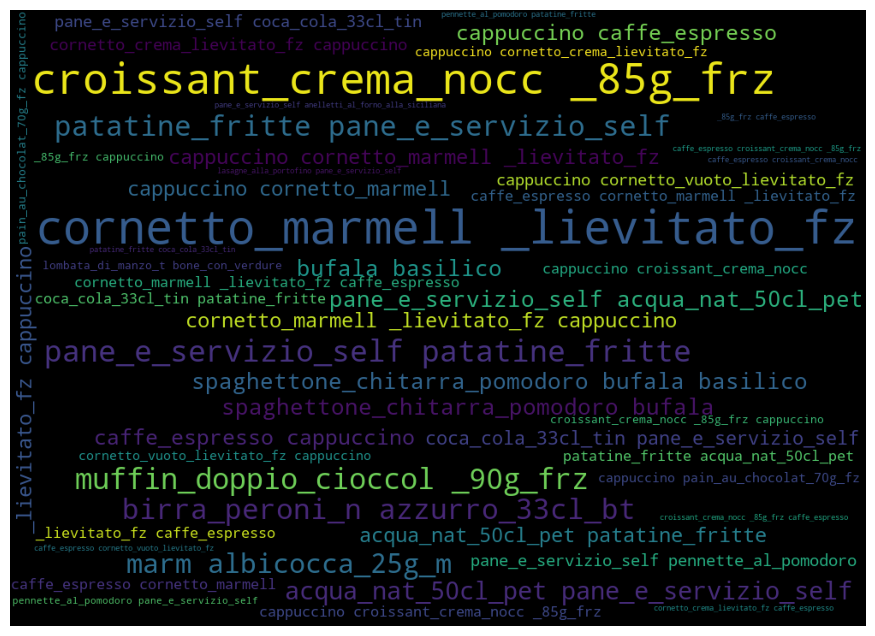

In [27]:
d = {}
for a, x in df_ngram.values:
    d[x] = a

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720,
                            collocations=False
                          ).generate_from_frequencies(d)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## Margin-Volume matrix


<AxesSubplot: >

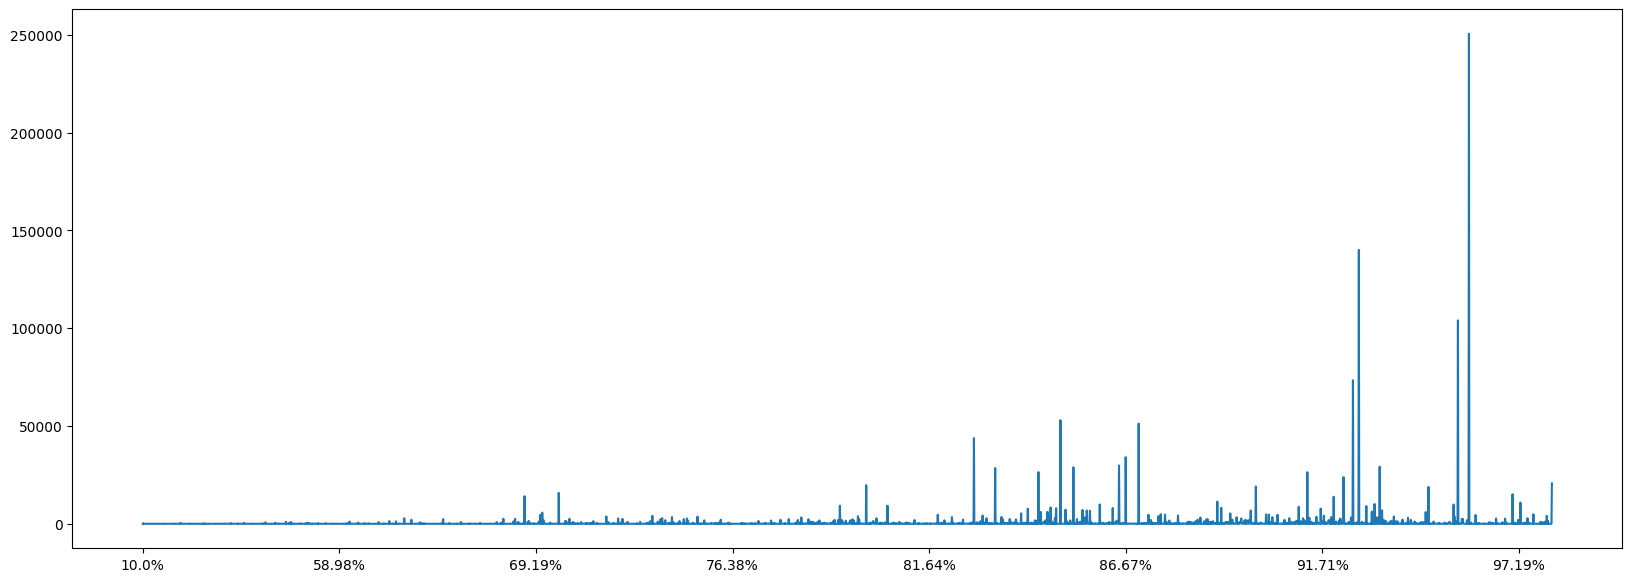

In [28]:
margins=seasonal_df['MARGIN'].value_counts()
margins=margins.drop(labels=['0.0%'])
margins.sort_index(inplace=True)
margins.plot(figsize=(20, 7))


<h2> Total earnings by weekend</h2>
<h4>Separate the data between weekend days and not.</h4>
<h4>Sunday - Wednesday  - Not weekend</h4>
<h4>Thursday - Saturday - Weekend.</h4>
<h4>Display the earning between them</h4>

<AxesSubplot: ylabel='None,WEEKEND_SALE'>

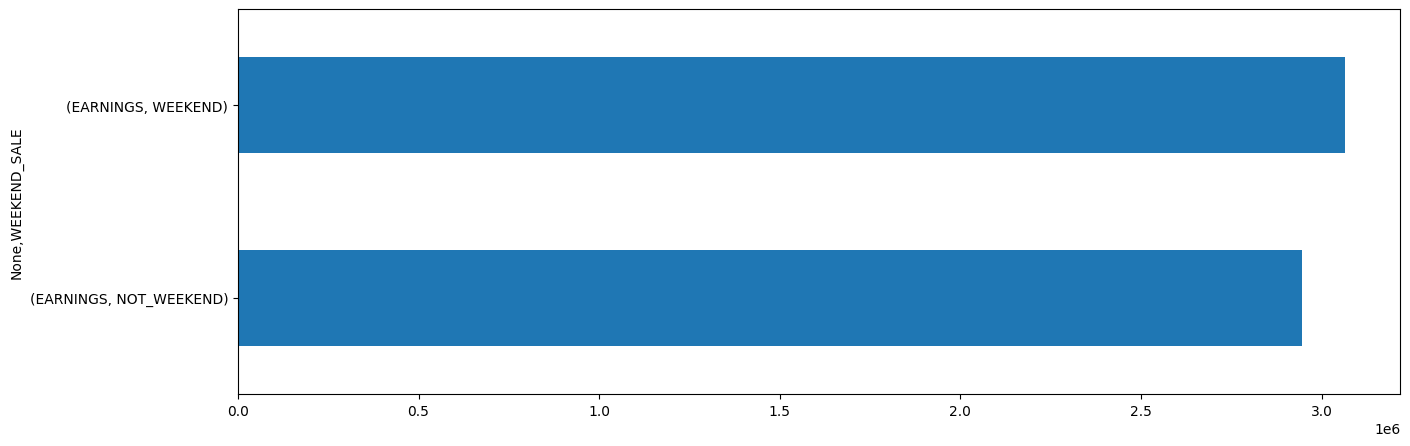

In [29]:
week_end_choice=['WEEKEND','NOT_WEEKEND']
weekend_mapping={}
for i in range(0,7):
    if(i in{4,6,5}):
        weekend_mapping[i]='WEEKEND'
    else:
        weekend_mapping[i]='NOT_WEEKEND'


seasonal_df['WEEKEND_SALE']=seasonal_df['SALE_DAY'].map(weekend_mapping)


seasonal_df.groupby(['WEEKEND_SALE']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(15,5))

<h1>Revenue per month</h1>

<AxesSubplot: ylabel='None,SALE_MONTH'>

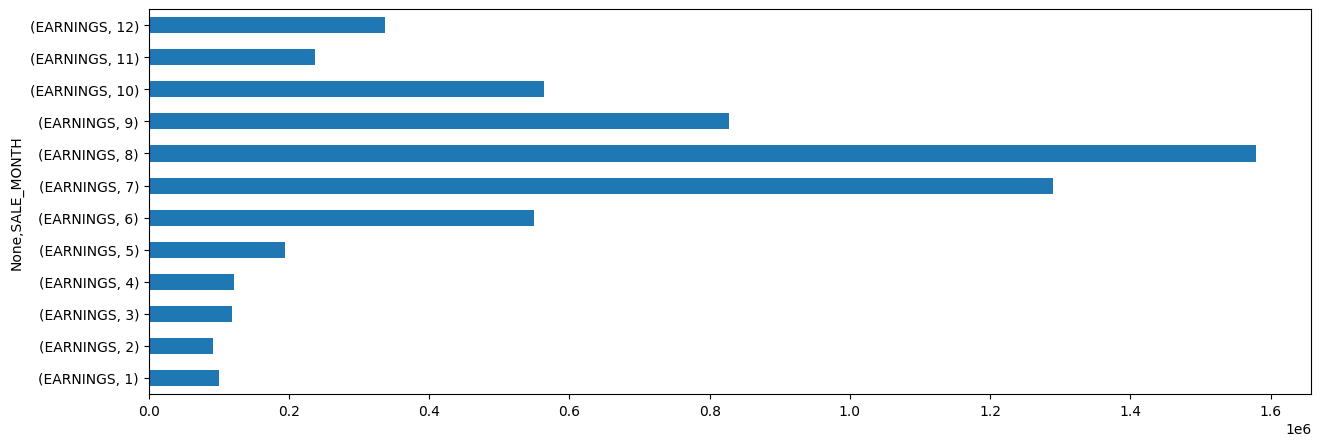

In [30]:
seasonal_df.groupby(['SALE_MONTH']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(15,5))

<h1>Products Popularity</h1>
<h4>Display the quantity of products between seasons </h4>

<AxesSubplot: ylabel='ITEM_CATEGORY'>

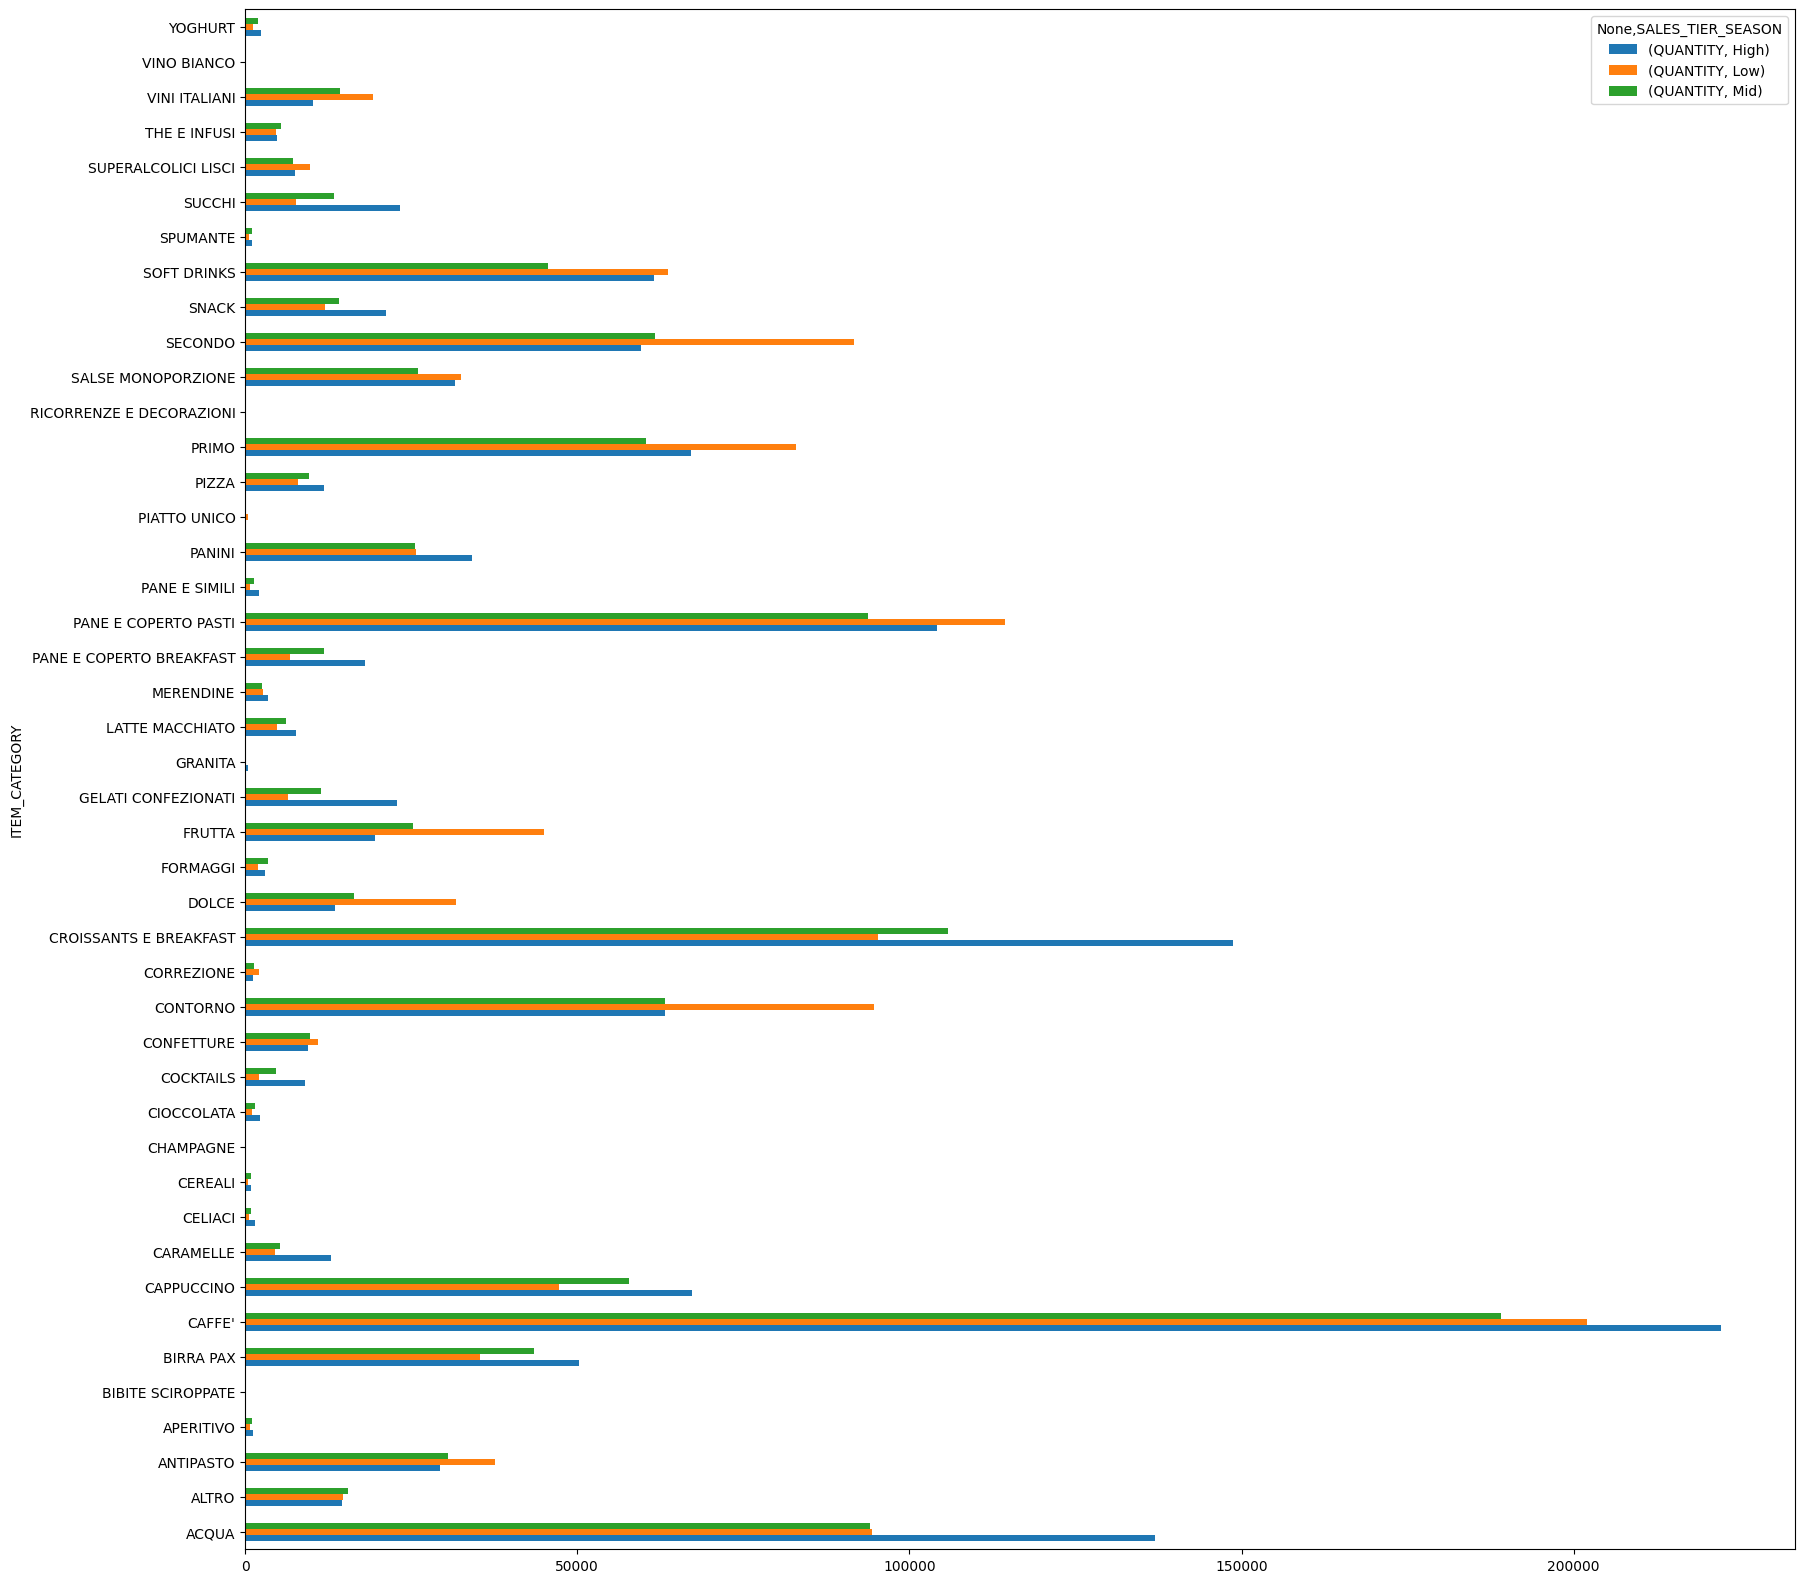

In [31]:
seasonal_df.groupby(['ITEM_CATEGORY','SALES_TIER_SEASON']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,20))

<h4>Display the quantity of products weekend and not weekend </h4>

<AxesSubplot: ylabel='ITEM_CATEGORY'>

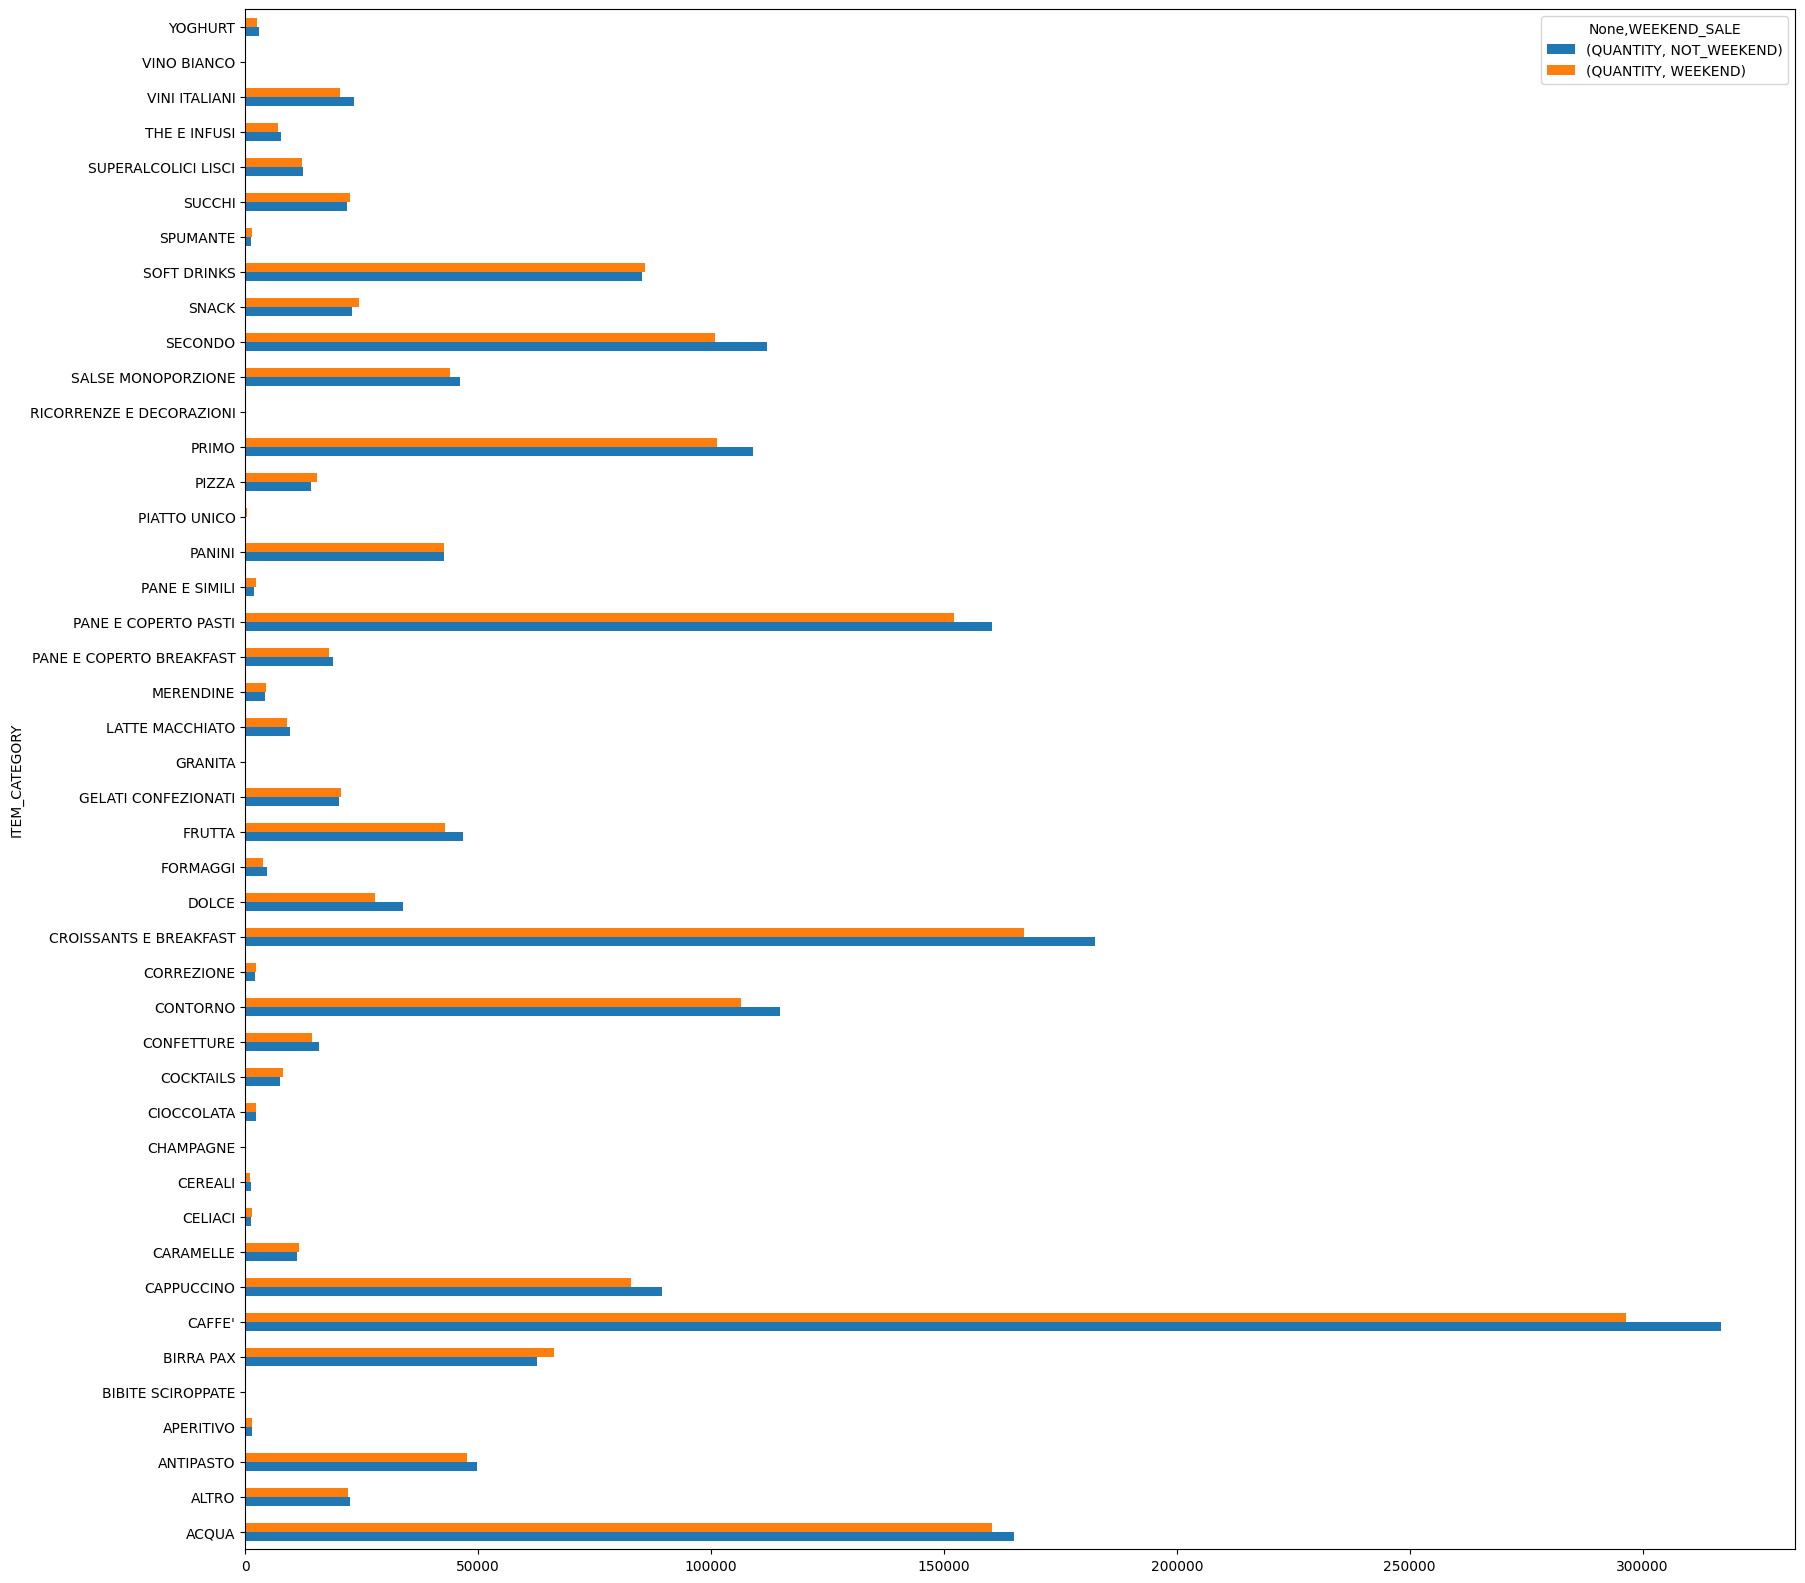

In [32]:
seasonal_df.groupby(['ITEM_CATEGORY','WEEKEND_SALE']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,20))

<h1>Separate the data to six groups according to seasons and weekends</h1>
<h4>Display the quantity </h4>

<AxesSubplot: ylabel='SALES_TIER_SEASON'>

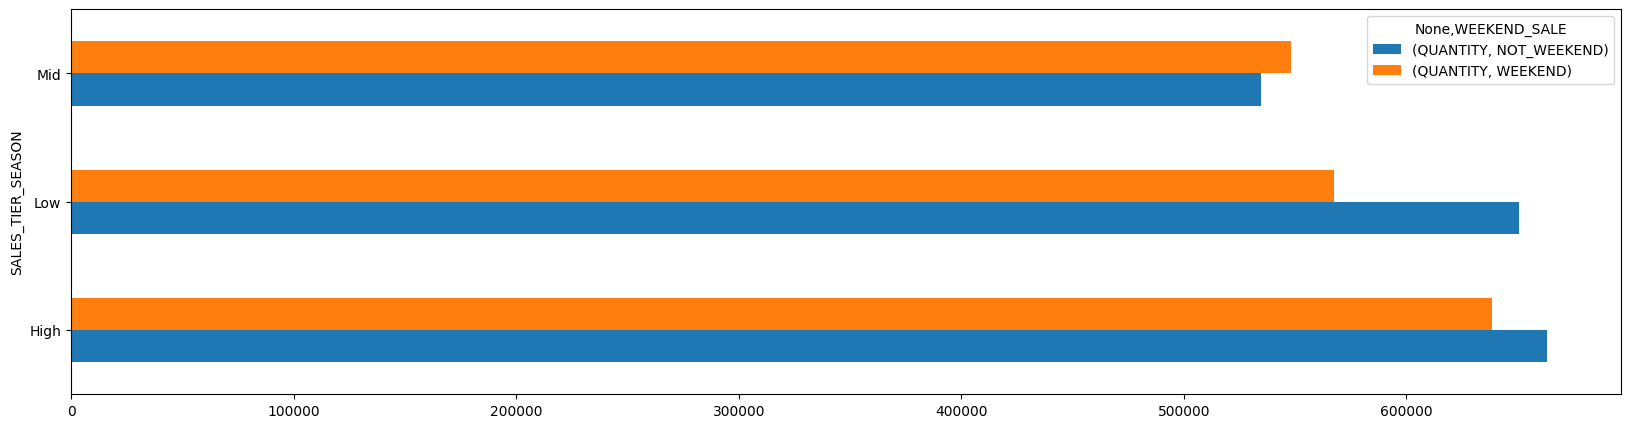

In [33]:
seasonal_df.groupby(['SALES_TIER_SEASON','WEEKEND_SALE']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,5))

<h4>Display the earnings </h4>

<AxesSubplot: ylabel='SALES_TIER_SEASON'>

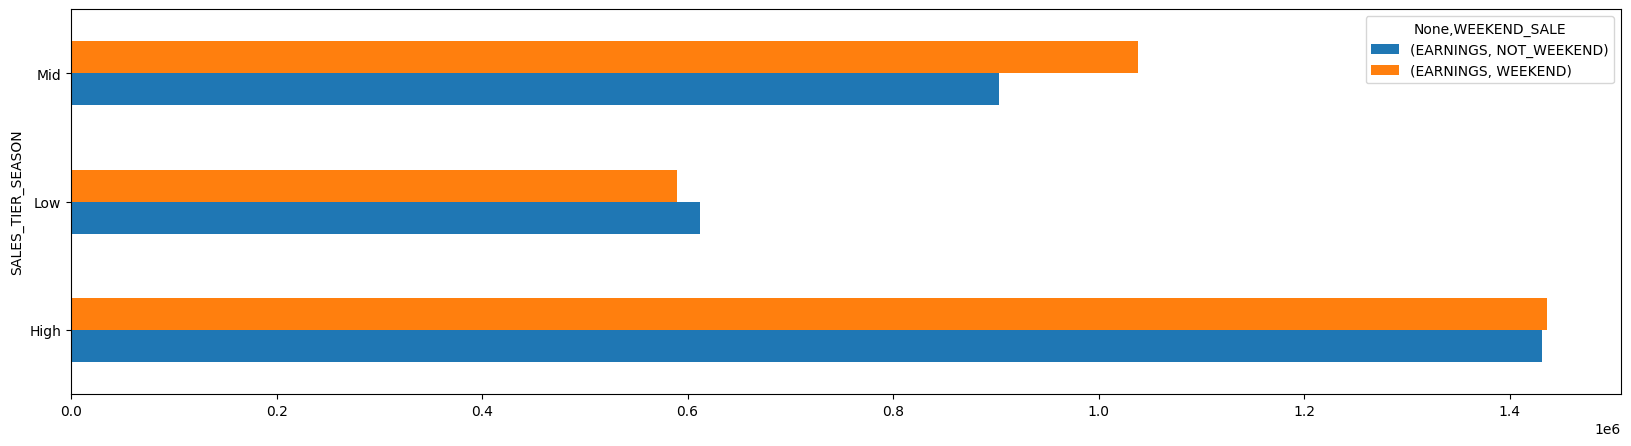

In [34]:
seasonal_df.groupby(['SALES_TIER_SEASON','WEEKEND_SALE']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(20,5))

# Average Margin Calculations

In [59]:
food_df = seasonal_df[seasonal_df['MENU_CATEGORY'] == 'FOOD']
print(seasonal_df['ITEM'].count())
print(food_df['SHIP'].count())
food_df['Seasons'].drop_duplicates()

2333815
1165990


3        Winter
13506    Spring
22311    Summer
64699    Autumn
Name: Seasons, dtype: object

## Winter

In [61]:
winter_avg_items_df = food_df[food_df['Seasons'] == 'Winter'].groupby(['ITEM']).agg({'QUANTITY':sum, 'MARGIN_RAW':sum})
winter_avg_items_df['AVG_MARGIN'] = winter_avg_items_df['MARGIN_RAW'] / winter_avg_items_df['QUANTITY']
winter_avg_items_df

,QUANTITY,MARGIN_RAW,AVG_MARGIN
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,280,49.341023,0.176218
ACCIUGHE PANATE FRITTE,17,0.000000,0.000000
AGNELLO AL FORNO CON PATATE E CARCIOFI,64,13.932554,0.217696
ALI DI POLLO SALE E PEPE (C),81,9.295000,0.114753
ALPENLIEBE S.Z.ORIGINAL ASTUC.,48,17.259333,0.359569
...,...,...,...
YOGURT IND. NATURALE,75,50.509617,0.673462
ZUCCHINE A SCAPECE (C),13,0.000000,0.000000
ZUPPA DI FAGIOLI (C),26,0.000000,0.000000


## Spring

In [62]:
spring_avg_items_df = food_df[food_df['Seasons'] == 'Spring'].groupby(['ITEM']).agg({'QUANTITY':sum, 'MARGIN_RAW':sum})
spring_avg_items_df['AVG_MARGIN'] = spring_avg_items_df['MARGIN_RAW'] / spring_avg_items_df['QUANTITY']
spring_avg_items_df

,QUANTITY,MARGIN_RAW,AVG_MARGIN
ITEM,,,
ACCIUGHE AL VERDE (C),67,6.274635,0.093651
ACCIUGHE PANATE FRITTE,9,1.442857,0.160317
AGNELLO AL FORNO CON PATATE E CARCIOFI,34,12.101875,0.355938
ALI DI POLLO SALE E PEPE (C),296,41.906250,0.141575
ALPENLIEBE S.Z.ORIGINAL ASTUC.,55,17.688000,0.321600
...,...,...,...
ZUPPA BORSCH,1,0.903636,0.903636
ZUPPA DI FAGIOLI (C),24,7.636364,0.318182
ZUPPA DI LEGUMI (C),8,0.000000,0.000000


## Autumn

In [63]:
autumn_avg_items_df = food_df[food_df['Seasons'] == 'Autumn'].groupby(['ITEM']).agg({'QUANTITY':sum, 'MARGIN_RAW':sum})
autumn_avg_items_df['AVG_MARGIN'] = autumn_avg_items_df['MARGIN_RAW'] / autumn_avg_items_df['QUANTITY']
autumn_avg_items_df

,QUANTITY,MARGIN_RAW,AVG_MARGIN
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,488,72.748475,0.149075
ACCIUGHE AL VERDE (C),17,0.723188,0.042540
AGNELLO AL FORNO CON PATATE E CARCIOFI,178,11.723596,0.065863
ALI DI POLLO SALE E PEPE (C),554,300.039340,0.541587
ALPENLIEBE S.Z.ORIGINAL ASTUC.,137,55.204333,0.402951
...,...,...,...
VERDURE GRIGLIATE E MOZZARELLA,18,7.234783,0.401932
VITELLO CON VERDURE (C),292,69.393874,0.237650
YOGURT IND. ALLA FRUTTA,1398,529.213829,0.378551


## Summer

In [64]:
summer_avg_items_df = food_df[food_df['Seasons'] == 'Summer'].groupby(['ITEM']).agg({'QUANTITY':sum, 'MARGIN_RAW':sum})
summer_avg_items_df['AVG_MARGIN'] = summer_avg_items_df['MARGIN_RAW'] / summer_avg_items_df['QUANTITY']
summer_avg_items_df

,QUANTITY,MARGIN_RAW,AVG_MARGIN
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,359,90.357713,0.251693
ACCIUGHE PANATE FRITTE,20,0.000000,0.000000
AGNELLO AL FORNO CON PATATE E CARCIOFI,156,36.388091,0.233257
AGRUMI SI SICILIA MONOPORZIONE,1,0.724138,0.724138
ALI DI POLLO SALE E PEPE (C),82,55.474120,0.676514
...,...,...,...
VITELLO CON VERDURE (C),58,26.991997,0.465379
YOGURT IND. ALLA FRUTTA,1821,1128.844309,0.619904
YOGURT IND. NATURALE,856,546.832873,0.638823


### Seasons Summary

In [66]:
summery_df = food_df['ITEM']